# Baseline Annotation of Observation based on trained spaCy (2.0.18) model 


<fig size= "4">
This notebook provides a baseline annotation suggestion by using refined named entity recognition that we provided using training a deep learning method by prodigy.  </p>
</fig size= "4">  

In [1]:
import spacy 
from spacy import displacy 


In [2]:
from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


## Read the Data

In [5]:
importVersion = '013'

In [6]:
path= '../data/01_df_v{0}.pickle'.format(importVersion)# Put the path of the data in your local machine here, consider the letter "r" before the path
dfAstroNova = pd.read_pickle(path)

In [7]:
# Sort the data based on the chapters of the book 
dfAstroNova['chapter'] = dfAstroNova.chapter.replace("appendix b",np.nan).astype(float)  
dfAstroNova = dfAstroNova.rename_axis('MyIdx').sort_values(by = ['chapter', 'MyIdx'], ascending = [True, True])
dfAstroNova.chapter.fillna('appendix b', inplace=True)

In [8]:
dfAstroNova.reset_index(inplace=True)
dfAstroNova=dfAstroNova.drop("MyIdx",axis=1,inplace=False)
dfAstroNova=dfAstroNova.drop("html",axis=1)

In [9]:
type(dfAstroNova)

pandas.core.frame.DataFrame

In [10]:
dfAstroNova.head()

,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
0,Chapter 1,[],[],1,[],[],[],[Chapter 1],"[[(Chapter, None), (1, NUM)]]"
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",[],[],1,[],[],[],"[On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.]","[[(On, None), (the, None), (distinction, None), (between, None), (the, None), (first, None), (motion, None), (and, None), (the, None), (second, None), (or, None), (proper, None), (motions, None), (and, None), (in, None), (the, None), (proper, None), (motio..."
2,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, ...",[],[],1,[],[],"[ Terms: 1. The first motion is that of the whole heaven and of all its stars from the east through the lowest part of the heavens to the east, in the period of 24 hours; in the present diagram, ABCD. 2. The second motions are those of the individual plane...","[The testimony of the ages confirms that the motions of the planets are orbicular., Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles., For among figures it is circles, and among bodies the heavens...","[[(The, None), (testimony, None), (of, None), (the, None), (ages, None), (confirms, None), (that, None), (the, None), (motions, None), (of, None), (the, None), (planets, None), (are, None), (orbicular, None)], [(Reason, None), (having, None), (borrowed, No..."
3,"It is just this from which astronomy arose among humans. Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whe...",[],[],1,[ ch 1 gr 1],[],[],"[It is just this from which astronomy arose among humans., Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles w...","[[(It, None), (is, None), (just, None), (this, None), (from, None), (which, None), (astronomy, None), (arose, None), (among, None), (humans, None)], [(Astronomy, None), (s, None), (aim, None), (is, None), (considered, None), (to, None), (be, None), (to, No..."
4,"Before the distinction between the first motion(1) and the second motions(2) was established, people noted (in contemplating the sun, moon and stars) that their diurnal paths were visually very nearly equivalent to circles. These were, however, entwined on...",[],[(such],1,[],[],[ 2],"[Before the distinction between the first motion(1) and the second motions(2) was established, people noted (in contemplating the sun, moon and stars) that their diurnal paths were visually very nearly equivalent to circles., These were, however, entwined ...","[[(Before, None), (the, None), (distinction, None), (between, None), (the, None), (first, None), (motion, None), (1, NUM), (and, None), (the, None), (second, None), (motions, None), (2, NUM), (was, None), (established, None), (people, None), (noted, None),..."


In [11]:
df=dfAstroNova.reset_index().text.str.split('.',expand=True).stack().reset_index(level=-1,drop=True)
type(df)

pandas.core.series.Series

In [12]:
 # Create lists to fill with values
l_col1 = []
l_col2 = []

# iterrate over each row and fill our lists
for ix, row in dfAstroNova.iterrows():
    for value in row['sentences']:
        l_col1.append(value)
        l_col2.append(row['chapter'])

# Create new dataframe from the two lists
df= pd.DataFrame({'sentences': l_col1 ,
                         'chapter': l_col2 })
df=df.rename(columns={"sentences":"sents"});

In [13]:
len(df)

6699

In [14]:
df.head()

,sents,chapter
0,Chapter 1,1
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1


# Upload customized spaCy model provioded by our training data in prodigy

In [15]:
path= '../data/Model_U08'
nlp=spacy.load(path)

In [16]:
def entity(x):
    a=[]
    b=[]
    for ent in nlp(x).ents:
        a +=ent.text,
        b +=ent.label_,
    c=list(zip(a,b))
    return c

In [17]:
def noun_chunk(x):
    a=[]
    for chunk in nlp(x).noun_chunks:
        a.append(chunk)
    return a

In [18]:
df['entities'] = df['sents'].apply(lambda x: entity(x))

In [19]:
df['chunks'] = df['sents'].apply(lambda x: noun_chunk(x))

In [20]:
df.head()

,sents,chapter,entities,chunks
0,Chapter 1,1,[],[(Chapter)]
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,[],"[(the, distinction), (the, first, motion), (the, second, or, proper, motions), (the, proper, motions), (the, second, inequality)]"
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,[],"[(The, testimony), (the, ages), (the, motions), (the, planets)]"
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,[],"[(Reason), (experience), (their, gyrations), (perfect, circles)]"
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,[],"[(figures), (it), (circles), (bodies)]"


In [21]:
df.tail()

,sents,chapter,entities,chunks
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[(Mars, PLAN), (opposition, ASTR), (Mars, PLAN), (Earth, PLAN), (Sun, PLAN), (17 hours 20 minutes, TIME), (Mars, PLAN), (eastward, ASTR), (16' 20"", LONG), (Sun, PLAN), (42' 18"", LONG)]","[(the, position), (Mars), (opposition), (Kepler), (the, angular, distance), (Mars), (Earth, —), (the, place), (the, Sun, —), (17, hours), (Mars), (the, Sun)]"
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[(longitude, ASTR), (Mars, PLAN), (opposition, ASTR), (198° 37' 50"", LONG), (Mars, PLAN), (orbit, ASTR), (198° 37' 10"", LONG), (18° 37' 10"" Libra, LONG)]","[(Kepler), (the, longitude), (Mars), (opposition), (he), (order), (Mars, 's, orbit), (he), (', 10, "", Libra)]"
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[(Sun, PLAN), (longitude, ASTR), (observation, ASTR), (Mars, PLAN)]","[(The, Sun), (its, longitude), (the, time), (observation), (its, position), (Mars)]"
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[(opposition, ASTR), (17 hours 20 minutes, TIME), (March 29, DATE), (observation, ASTR)]","[(the, time), (opposition), (17, hours), (March), (the, observation)]"
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[(opposition, ASTR), (March 28, DATE), (4h 23m, TIME)]","[(Kepler), (the, time), (opposition), (March)]"


In [22]:
def annot_observation_01(x):
    y=0
    if x is not None:
        for idx in range(0,len(x)):
                    if any ([x[idx][1] == 'DATE', x[idx][1] == 'LONG', x[idx][1] == 'TIME']):
                        y=1
                    else:
                        y=0   
    else:
        y=0
    return y
                    
       

    

In [23]:
df['label'] = df['entities'].apply(lambda x: annot_observation_01(x))

In [24]:
df.head(10)

,sents,chapter,entities,chunks,label
0,Chapter 1,1,[],[(Chapter)],0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,[],"[(the, distinction), (the, first, motion), (the, second, or, proper, motions), (the, proper, motions), (the, second, inequality)]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,[],"[(The, testimony), (the, ages), (the, motions), (the, planets)]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,[],"[(Reason), (experience), (their, gyrations), (perfect, circles)]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,[],"[(figures), (it), (circles), (bodies)]",0
5,"However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",1,"[(rise, ASTR)]","[(experience), (something), (who), (careful, attention), (the, planets), (a, simple, circular, path), (it), (rise), (a, powerful, sense), (wonder), (length), (people), (causes)]",0
6,It is just this from which astronomy arose among humans.,1,[],"[(It), (astronomy), (humans)]",0
7,"Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the pos...",1,[],"[(Astronomy, 's, aim), (the, stars, ', motions), (earth), (heaven), (the, specific, circles), (the, stars), (their, aid), (the, positions), (appearances), (those, stars), (any, given, time)]",0
8,"Before the distinction between the first motion(1) and the second motions(2) was established, people noted (in contemplating the sun, moon and stars) that their diurnal paths were visually very nearly equivalent to circles.",1,"[(diurnal, ASTR)]","[(the, distinction), (the, first, motion(1), (the, second, motions(2), (people), (the, sun), (moon), (stars), (their, diurnal, paths), (circles)]",0
9,"These were, however, entwined one upon another like yarn on a ball, and the circles were for the most part smaller(3) circles of the sphere, rarely the greatest(4) (such",1,[],"[(yarn), (a, ball), (the, circles), (the, most, part), (circles), (the, sphere), (rarely, the, greatest(4)]",0


In [25]:
df.tail(10)

,sents,chapter,entities,chunks,label
6689,"Kepler determined the diurnal motions of the Sun and Mars to be 58' 38"" and 22' 36"" respectively, and the sum of the diurnal motions was 1° 21' 14"".",appendix b,"[(diurnal, ASTR), (Sun, PLAN), (Mars, PLAN), (58' 38"", LONG), (22' 36"", LONG), (diurnal, ASTR), (1° 21' 14"", LONG)]","[(Kepler), (the, diurnal, motions), (the, Sun), (Mars), (the, sum), (the, diurnal, motions), (1, °)]",1
6690,"With the sum of the diurnal motions of Mars and the Sun (1° 21' 14""), Kepler computed the time it takes for Mars and the Sun to move 58' 38"", that is, about 17 hours 20 minutes.",appendix b,"[(diurnal, ASTR), (Mars, PLAN), (Sun, PLAN), (1° 21' 14"", LONG), (Mars, PLAN), (Sun, PLAN), (58' 38"", LONG), (17 hours 20 minutes, TIME)]","[(the, sum), (the, diurnal, motions), (Mars), (the, Sun), ((, 1, °), (Kepler), (it), (Mars), (the, Sun)]",1
6691,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system.",appendix b,"[(Sun, PLAN)]","[(Figure, 2B), (the, Sun), (the, center), (the, planetary, system)]",0
6692,"The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively.",appendix b,"[(longitudes, ASTR), (Mars, PLAN), (Earth, PLAN), (Sun, PLAN), (198° 21' 30"", LONG), (199° 20' 8"", LONG)]","[(The, longitudes), (Mars), (Earth), (reference), (the, center), (the, Sun)]",1
6693,"The deviation of elongation between Mars and the Earth remain 58' 38"".",appendix b,"[(elongation, ASTR), (Mars, PLAN), (Earth, PLAN), (58' 38"", LONG)]","[(The, deviation), (elongation), (Mars), (the, Earth)]",1
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[(Mars, PLAN), (opposition, ASTR), (Mars, PLAN), (Earth, PLAN), (Sun, PLAN), (17 hours 20 minutes, TIME), (Mars, PLAN), (eastward, ASTR), (16' 20"", LONG), (Sun, PLAN), (42' 18"", LONG)]","[(the, position), (Mars), (opposition), (Kepler), (the, angular, distance), (Mars), (Earth, —), (the, place), (the, Sun, —), (17, hours), (Mars), (the, Sun)]",1
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[(longitude, ASTR), (Mars, PLAN), (opposition, ASTR), (198° 37' 50"", LONG), (Mars, PLAN), (orbit, ASTR), (198° 37' 10"", LONG), (18° 37' 10"" Libra, LONG)]","[(Kepler), (the, longitude), (Mars), (opposition), (he), (order), (Mars, 's, orbit), (he), (', 10, "", Libra)]",1
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[(Sun, PLAN), (longitude, ASTR), (observation, ASTR), (Mars, PLAN)]","[(The, Sun), (its, longitude), (the, time), (observation), (its, position), (Mars)]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[(opposition, ASTR), (17 hours 20 minutes, TIME), (March 29, DATE), (observation, ASTR)]","[(the, time), (opposition), (17, hours), (March), (the, observation)]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[(opposition, ASTR), (March 28, DATE), (4h 23m, TIME)]","[(Kepler), (the, time), (opposition), (March)]",1


In [26]:
df[df.chapter==10]

,sents,chapter,entities,chunks,label
962,Chapter 10,10,[],[(Chapter)],0
963,"Consideration of the observations themselves, with which Tycho Brahe hunted for the moments of opposition to the mean sun.",10,"[(Tycho Brahe, NAME), (opposition, ASTR)]","[(Consideration), (the, observations), (themselves), (Tycho, Brahe), (the, moments), (opposition), (the, mean, sun)]",0
964,"In an enquiry of such precision, I could not have foregone a deeper inspection of the foundations themselves.",10,[],"[(an, enquiry), (such, precision), (I), (a, deeper, inspection), (the, foundations), (themselves)]",0
965,And Brahe had given me the opportunity to make use of his observations.,10,[],"[(Brahe), (me), (the, opportunity), (use), (his, observations)]",0
966,This is what I found.,10,[],"[(what), (I)]",0
967,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows.",10,"[(1580 November 12, DATE), (10h, TIME), (Mars, PLAN), (8° 36’ 50” Gemini2, LONG), (diurnal, ASTR)]","[(November), (they), (Mars), (8, °), (Gemini2), (the, horizontal, variations), (which, term), (I), (the, diurnal, parallaxes), (the, refractions), (what)]",0
968,Now this observation is distant and isolated.,10,"[(observation, ASTR)]","[(this, observation)]",0
969,It was reduced to the moment of opposition using the diurnal motion from the Prutenic Tables ^3.,10,"[(opposition, ASTR), (diurnal, ASTR)]","[(It), (the, moment), (opposition), (the, diurnal, motion)]",0
970,"For in Maestlin,4 on the twelfth at noon, Mars is put at 8° 20’ Gemini, and on the seventeenth, again at noon, it is at 6° 25’ Gemini.",10,"[(Maestlin,4, NAME), (Mars, PLAN), (8° 20’ Gemini, LONG), (6° 25’ Gemini., LONG)]","[(Maestlin,4), (the, twelfth), (noon), (Mars), (Gemini), (the, seventeenth), (noon), (it), (Gemini)]",1
971,"Therefore, the motion over five whole days would be 1° 55’.",10,"[(1° 55’, LONG)]","[(the, motion), (five, whole, days)]",1


In [27]:
df.sents[1]

'On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.'

In [28]:
def show_chapter(x):
     return df.loc[df.chapter==x]



In [29]:
len(df)

6699

In [30]:
interact(show_chapter,x=(1,70,1))
         

,sents,chapter,entities,chunks,label
3175,Chapter 35,35,[],[(Chapter)],0
3176,"Whether the motion from the sun, like its light, is subject to privation in the planets through occultations ^1.",35,[],"[(the, motion), (the, sun), (its, light), (privation), (the, planets)]",0
3177,"This is a good time for me to take up the objections raised in Chapter 33, where to the kinship of light and motive power were opposed, first, the mutual occultations of the celestial bodies, and then, the different [manner of] emanation of the species of ...",35,[],"[(a, good, time), (me), (the, objections), (Chapter), (the, kinship), (light, and, motive, power), (the, celestial, bodies), (then, ,, the, different, [, manner), (emanation), (the, species)]",0
3178,"And concerning the first, it is worthy of consideration whether, just as one opaque body intercepts another's sunlight, mobile bodies similarly impede one another in motion when they lie in line with the sun.",35,[],"[(it), (consideration), (one, opaque, body), (another, 's, sunlight), (mobile, bodies), (motion), (they), (line), (the, sun)]",0
3179,"If so, light would clearly be the vehicle or instrument of the motive power.",35,[],"[(light), (the, vehicle), (instrument), (the, motive, power)]",0
3180,"It might appear that in order to avoid this as much as possible, God introduced the relative inclinations of all the eccentrics, deviations from the ecliptic, and transpositions of the nodes, as well as the proportions of the bodies and the attenuation of ...",35,"[(ecliptic, ASTR), (nodes, ASTR)]","[(It), (order), (God), (the, relative, inclinations), (all, the, eccentrics), (deviations), (the, ecliptic), (transpositions), (the, nodes), (the, proportions), (the, bodies), (the, attenuation), (shadows), (a, cone)]",0
3181,"And since it would not be possible completely to prevent the stars' occasionally lining up with the sun, it is tempting to suppose that the very slow motions of the apsides and nodes (which are, as it were, a kind of aberration of the epicycles from their...",35,"[(apsides, ASTR), (nodes, ASTR)]","[(it), (the, stars), (the, sun), (it), (the, very, slow, motions), (the, apsides), (nodes), (it), (a, kind), (aberration), (the, epicycles), (their, periodic, times), (their, origin, thence)]",0
3182,"But it is answered, first, that the analogy between light and motive power is not to be disturbed by rashly confusing their properties.",35,[],"[(it), (the, analogy), (light, and, motive, power), (their, properties)]",0
3183,"Light is impeded by the opaque, but is not impeded by a body, because light is light, and does not act upon the body but on the surface (or as if on the surface).",35,[],"[(Light), (the, opaque), (a, body), (light), (the, body), (the, surface), (the, surface)]",0
3184,Power acts upon the body without respect to its opacity.,35,[],"[(Power), (the, body), (respect), (its, opacity)]",0


<function __main__.show_chapter(x)>

## Save the result as a JSON file

Since we used spacy in columns and spacy used cython, converting directly to json was not possible. we did this approach to save the data to json.

In [31]:
df.to_csv("./df_obs.csv")

In [32]:
csvFile = pd.DataFrame(pd.read_csv("df_obs.csv", sep = ",", header = 0, index_col = False))
csvFile.to_json("dfObs_v02.json")

In [33]:
pd.read_json('dfObs_v02.json', sorted);
df.sort_index(axis=0);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


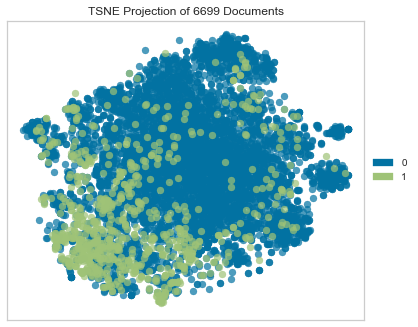

In [34]:
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
X=df.sents
y=df.label
tfidf  = TfidfVectorizer()
docs   = tfidf.fit_transform(X)
labels = y
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

In [35]:
def depen_interact(x):
    c=displacy.render(nlp(df.sents[x]),style="dep",jupyter="True")
    return c


In [36]:
interact(depen_interact, x=(0,len(df),1));

# Idea of using SDP

In [37]:
import spacy
import networkx as nx

doc = nlp(u'where the equation caused by the eccentricity is maximum. ')
print('sentence:'.format(doc))
# Load spacy's dependency tree into a networkx graph
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
graph = nx.Graph(edges)
# Get the length and path
entity1 = 'equation'.lower()
entity2 = 'eccentricity'
print(nx.shortest_path_length(graph, source=entity1, target=entity2))
print(nx.shortest_path(graph, source=entity1, target=entity2))

sentence:
2
['equation', 'the', 'eccentricity']


In [38]:
displacy.render(doc,style="dep",jupyter="True" )

In [39]:
edges

[('equation', 'the'),
 ('equation', 'caused'),
 ('caused', 'by'),
 ('by', 'eccentricity'),
 ('eccentricity', 'the'),
 ('is', 'where'),
 ('is', 'equation'),
 ('is', 'maximum'),
 ('is', '.')]

In [40]:
graph.is_directed()

False

In [41]:
graph.number_of_nodes()

9

In [42]:
graph.number_of_edges()

9

In [43]:
graph.degree

DegreeView({'equation': 3, 'the': 2, 'caused': 2, 'by': 2, 'eccentricity': 2, 'is': 4, 'where': 1, 'maximum': 1, '.': 1})

In [44]:
for token in doc:
    print((token.head.text, token.text, token.dep_))

('is', 'where', 'advmod')
('equation', 'the', 'det')
('is', 'equation', 'nsubj')
('equation', 'caused', 'acl')
('caused', 'by', 'agent')
('eccentricity', 'the', 'det')
('by', 'eccentricity', 'pobj')
('is', 'is', 'ROOT')
('is', 'maximum', 'acomp')
('is', '.', 'punct')


# Example 2

In [45]:
doc = nlp(u'A biopsy of this mass was consistent with hematoma ')
print('sentence:'.format(doc))
# Load spacy's dependency tree into a networkx graph
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
graph = nx.Graph(edges)
# Get the length and path
entity1 = 'biopsy'.lower()
entity2 = 'hematoma'
print(nx.shortest_path_length(graph, source=entity1, target=entity2))
print(nx.shortest_path(graph, source=entity1, target=entity2))

sentence:
4
['biopsy', 'was', 'consistent', 'with', 'hematoma']


In [46]:
displacy.render(doc,style="dep",jupyter="True" )